<a href="https://colab.research.google.com/github/951237/TIL/blob/master/200818_TIL_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%EB%B0%B0%EC%B6%94%EA%B0%80%EA%B2%A9_%EB%A6%AC%ED%8C%A9%ED%86%A0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 배추가격 예상하기_리팩토링 200818

## 0. 라이브러리 호출

In [1]:
import tensorflow as tf
import pandas as pd

URL = "/content/drive/My Drive/data/ML/배추가격_데이터_예제_price data.csv"

## 1. 과거데이터 가져오기

In [2]:
배추가격 = pd.read_csv(URL)

In [9]:
배추가격.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      2922 non-null   int64  
 1   avgTemp   2922 non-null   float64
 2   minTemp   2922 non-null   float64
 3   maxTemp   2922 non-null   float64
 4   rainFall  2922 non-null   float64
 5   avgPrice  2922 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 137.1 KB


In [31]:
배추가격.corr()

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
year,1.000000,0.038033,0.027893,0.046713,-0.057329,0.034894
avgTemp,0.038033,1.000000,0.986966,0.986756,0.254739,0.158059
minTemp,0.027893,0.986966,1.000000,0.950817,0.316686,0.154119
maxTemp,0.046713,0.986756,0.950817,1.000000,0.178906,0.159981
rainFall,-0.057329,0.254739,0.316686,0.178906,1.000000,0.040567
avgPrice,0.034894,0.158059,0.154119,0.159981,0.040567,1.000000


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


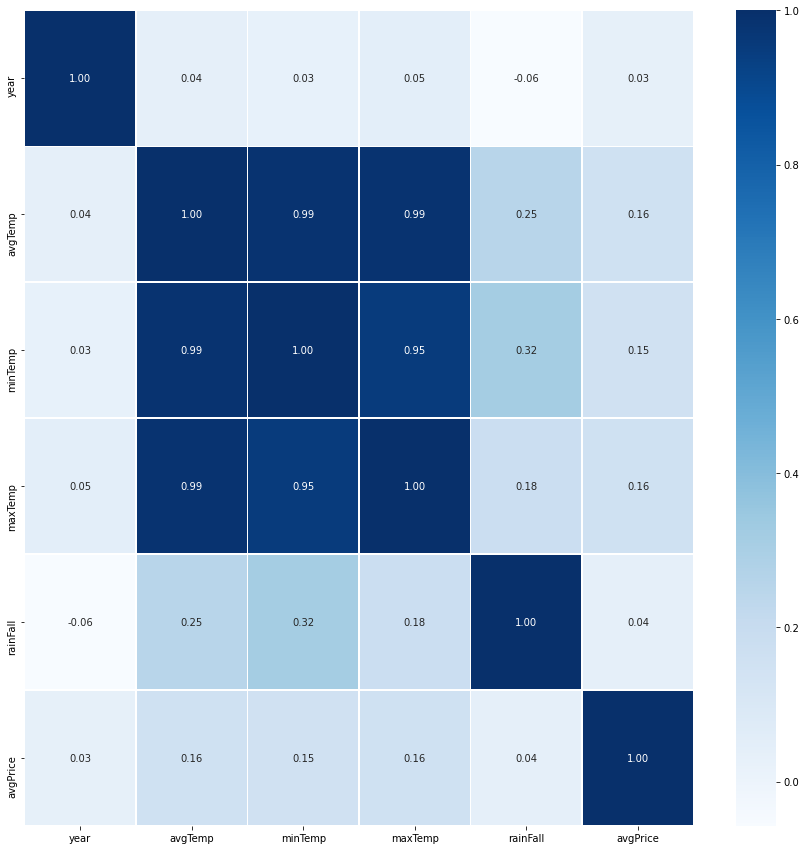

In [34]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=배추가격.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')

In [3]:
배추가격.columns

Index(['year', 'avgTemp', 'minTemp', 'maxTemp', 'rainFall', 'avgPrice'], dtype='object')

In [35]:
i_val = 배추가격[['avgTemp', 'minTemp', 'maxTemp']]
d_val = 배추가격[['avgPrice']]

## 2. 모델 만들기

In [36]:
X = tf.keras.layers.Input(shape=[3])

H = tf.keras.layers.Dense(6)(X) #히든레이어
H = tf.keras.layers.BatchNormalization()(H) #배치노멀라제이션 - 학습의 효율을 높이는 장치
H = tf.keras.layers.Activation('swish')(H) #학습효율이 높은 엑티베이션

H = tf.keras.layers.Dense(6)(H) # 2중 히든레이어
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(6)(H) # 3중 히든레이어
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(1)(H) # 히든레이어로 받기
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse")

In [37]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 24        
_________________________________________________________________
batch_normalization_9 (Batch (None, 6)                 24        
_________________________________________________________________
activation_9 (Activation)    (None, 6)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 42        
_________________________________________________________________
batch_normalization_10 (Batc (None, 6)                 24        
_________________________________________________________________
activation_10 (Activation)   (None, 6)                

## 3. 모델 훈련하기(FIT)

In [44]:
history = model.fit(i_val, d_val, epochs=500, batch_size=100, validation_split=0.25)

Epoch 1/500
22/22 [==============================] - 0s 4ms/step - loss: 1771498.6250 - val_loss: 4347934.0000
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 1751972.8750 - val_loss: 4351817.0000
Epoch 3/500
22/22 [==============================] - 0s 2ms/step - loss: 1749769.5000 - val_loss: 3980073.7500
Epoch 4/500
22/22 [==============================] - 0s 2ms/step - loss: 1752746.5000 - val_loss: 4134976.5000
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: 1745373.1250 - val_loss: 3998785.5000
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: 1740568.3750 - val_loss: 3836021.7500
Epoch 7/500
22/22 [==============================] - 0s 2ms/step - loss: 1750707.6250 - val_loss: 3757055.2500
Epoch 8/500
22/22 [==============================] - 0s 3ms/step - loss: 1732690.8750 - val_loss: 3705173.7500
Epoch 9/500
22/22 [==============================] - 0s 2ms/step - loss: 1728620.7500 - val_loss: 3745331.2500
E

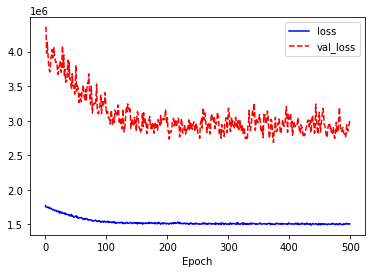

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 4. 모델 이용하기

In [48]:
print("예측하기 : ", model.predict(i_val[-10:]))

예측하기 :  [[3032.248 ]
 [2958.455 ]
 [2539.8623]
 [2689.5144]
 [2595.2683]
 [2862.645 ]
 [2728.4824]
 [2586.5215]
 [2839.1992]
 [2625.0486]]


In [49]:
d_val[-10:]

,avgPrice
2912,2800
2913,2800
2914,2800
2915,2800
2916,2823
2917,2865
2918,2884
2919,2901
2920,2901
2921,2901


### 결과 예측하기

In [ ]:
data = [20, 5, 30, 4]
avg_temp, min_temp, max_temp, rain_fall = data
print(f"평균온도 {avg_temp} / 최저온도 {min_temp} / 최고온도 {max_temp} / 강수량 {rain_fall}의 배추가격=",model.predict(np.array(data).reshape(1,4)))


평균온도 20 / 최저온도 5 / 최고온도 30 / 강수량 4의 배추가격= [[3896.393]]


### 모델 저장하기

In [ ]:
model.save('/content/drive/My Drive/data/ML/배추가격예상하기/predic_cabbage.h5')

### tensorflowjs변환
참고 : https://www.tensorflow.org/js/tutorials/conversion/import_keras

In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

In [ ]:

tfjs.converters.save_keras_model(model, '/content/drive/My Drive/data/ML/배추가격예상하기_200507')

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


### 모델 불러오기
참고 : https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

import tensorflow as tf
import numpy as np
import pandas as pd

model = Sequential()
model.add(Dense(1, input_dim = 4))

# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성합니다
new_model = keras.models.load_model('/content/drive/My Drive/data/ML/배추가격예상하기/predic_cabbage.h5')
new_model.summary()

data = [20, 5, 30, 4]
avg_temp, min_temp, max_temp, rain_fall = data
print(f"평균온도 {avg_temp} / 최저온도 {min_temp} / 최고온도 {max_temp} / 강수량 {rain_fall}의 배추가격=",model.predict(np.array(data).reshape(1,4)))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
평균온도 20 / 최저온도 5 / 최고온도 30 / 강수량 4의 배추가격= [[-16.917898]]
